# Сборный проект "Games"

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)


Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Изучение общей информации.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
print(data.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [6]:
print(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Пропущенные значения в столбцах Year_of_Release, Critic_Score, User_Score, Rating. 

Year_of_Release - отсутствует информация о дате выхода игры, пропущенных значений не так много, оставим их как есть.

Critic_Score - игра не была оценена критиками, пропущенных значений много, их заполнение какимо-либо данными приведет к искажению общей информации, оставим как есть.

User_Score - такая же ситуация как с Critic_Score, оставляем как есть.

Rating - у игр не определен рейтинг, возможно, организация появилась не так давно и некоторые игры просто не оценены. Заменим на "нет рейтинга".

Типы данных : 

Year_of_Release нужно привести к типу данных int, так как это целые числа.

User_Score приведем к типу данных float, так как это рейтинг.

Также в столбце Critic_Score  можно заметить, что чила целые, проверим точно ли это и приведем к типу int. Возможно критики высталвют оценки только в целых числах.

Приведем названия столбцов к нижнему регистру. 

## Предобработка данных

In [7]:
data.columns = data.columns.str.lower()
data.columns
# привели столбцы к нижнему регистру

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
data['user_score'].unique()
# видим значение tbd, оно не дает перевести стобец в float, посмотрим что оно означает
# tbd  пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.
# Заменим tbd на Nan
data['user_score'] = data['user_score'].replace('tbd',  np.NaN)
data['user_score'] = data['user_score'].astype('float64')

In [9]:
#заменим Nan на 'нет рейтинга', чтобы не потерять данные
data['rating'] = data['rating'].fillna('нет рейтинга')

In [10]:
data['critic_score'].unique()
# Догадки подтвердились, заменям на int
data['critic_score'] = data['critic_score'].astype('Int64')
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [11]:
#Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,нет рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,нет рейтинга,31.38


## Исследовательский анализ данных

### Посмотрим сколько игр выпускалось в разные годы. 

<AxesSubplot:title={'center':'Cколько игр выпускалось в разные годы'}, xlabel='Год выпуска', ylabel='Количество выпущенных игр'>

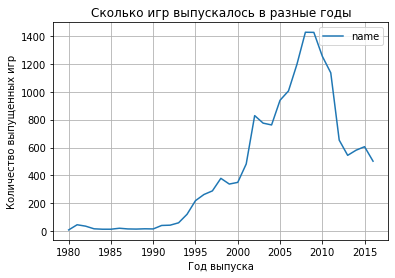

In [12]:
data_years = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

data_years.plot(title = 'Cколько игр выпускалось в разные годы', grid = True,
                xlabel = 'Год выпуска', ylabel = 'Количество выпущенных игр')

Вывод : 

Исходя из графика количество выпущенных игр  начало расти с 1990х годов до 2008 года, пик приходится на 2008 год.

С 2008 года, на графике резкий спад выпущенных игр, возможно это связано с популярностью игр на телефонах.

### Посмотрим как менялись продажи по платформам.

<AxesSubplot:xlabel='platform'>

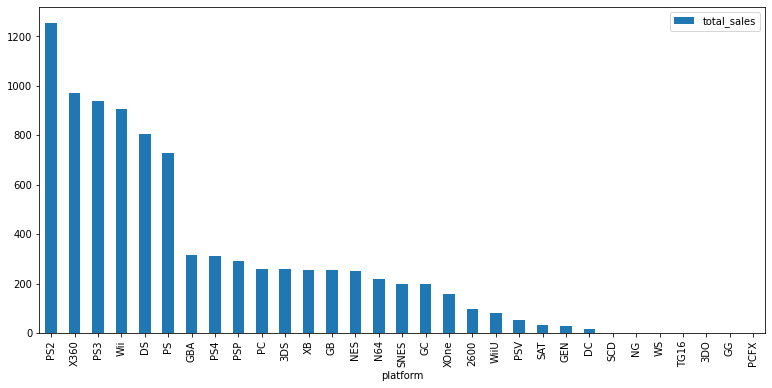

In [13]:
data_platform = data.pivot_table(index = 'platform', values = 'total_sales',
                                 aggfunc = 'sum').sort_values(by='total_sales', ascending=False)

data_platform.plot(kind='bar', figsize=(13,6))

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS

Их продажи составляют более 600 миллионов.|


### Составим таблицу, где будут только популярные платформы и посмотрим их рапсредление по годам.

In [14]:
data_top = data.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')
data_top.head(5)
#таблица с топ-6 платформами

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


In [15]:
list_games =["PS2", "X360", "PS3", "Wii", "DS", "PS"]

In [16]:
data_platform_top = data_top.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum')

In [17]:
#функция для составляения графиков по срезам
def games (data,title):
    data.plot(kind = 'bar', figsize=(15,8), title=title)

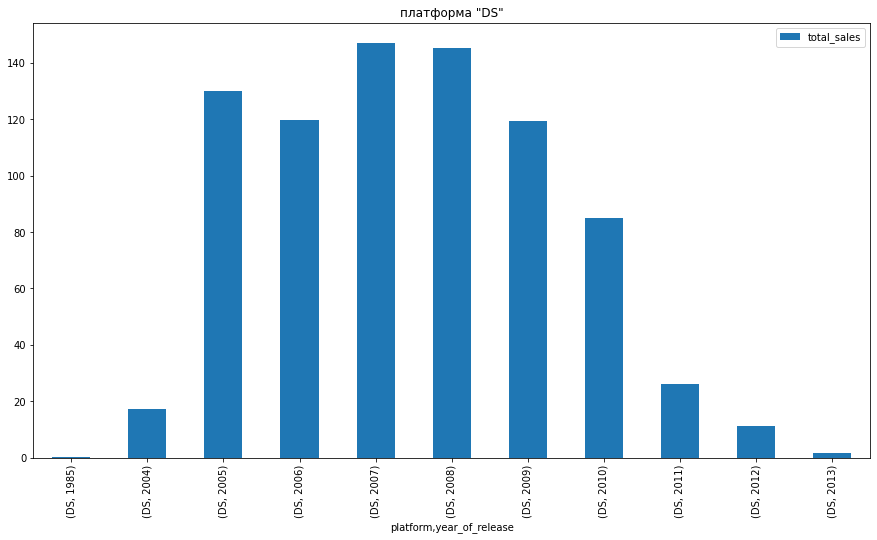

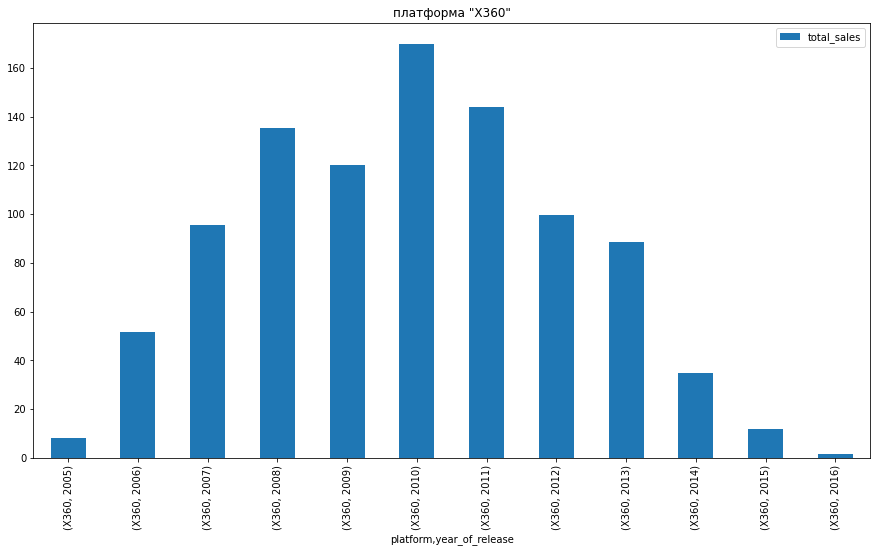

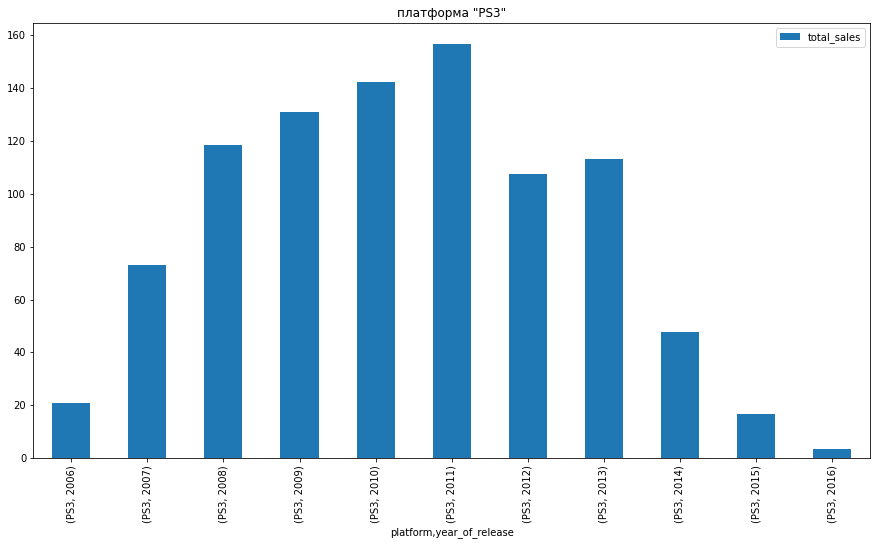

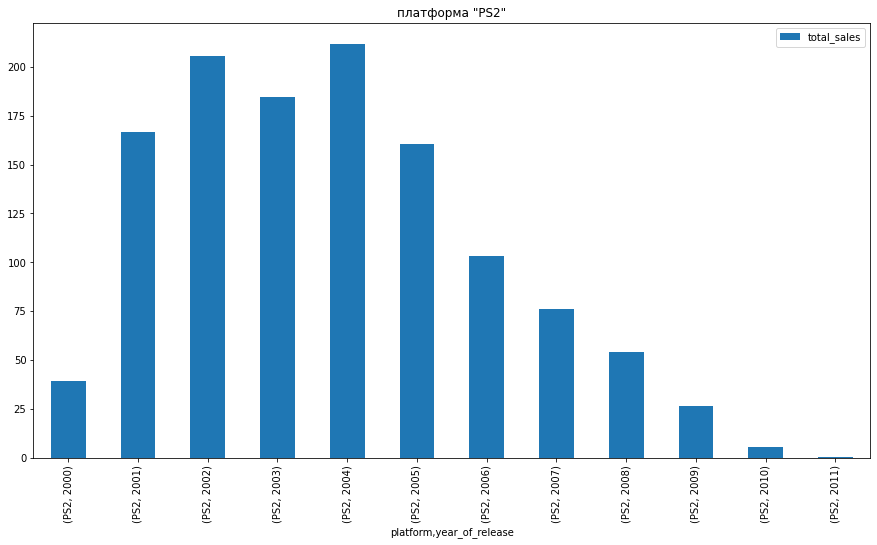

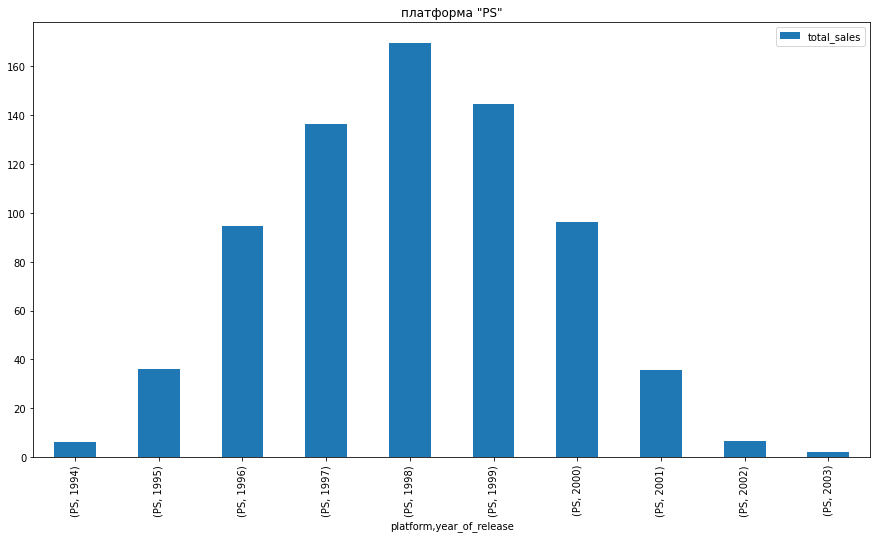

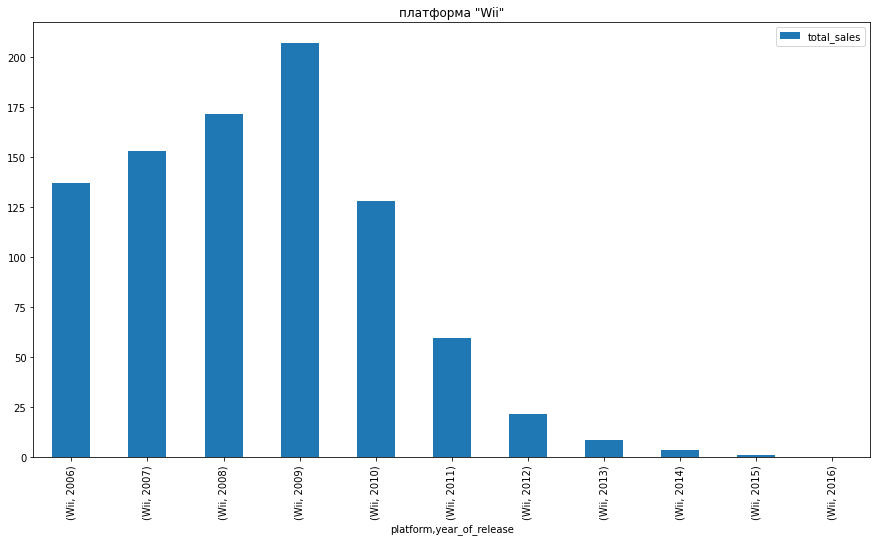

In [18]:
games(data_platform_top.query('platform == "DS"'), 'платформа "DS"')
games(data_platform_top.query('platform == "X360"'), 'платформа "X360"')
games(data_platform_top.query('platform == "PS3"'), 'платформа "PS3"')
games(data_platform_top.query('platform == "PS2"'), 'платформа "PS2"')
games(data_platform_top.query('platform == "PS"'), 'платформа "PS"')
games(data_platform_top.query('platform == "Wii"'), 'платформа "Wii"')

PS2


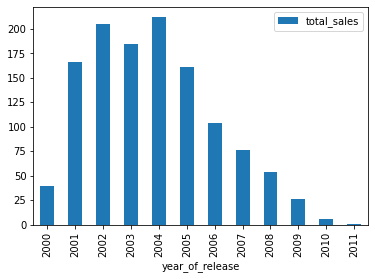

X360


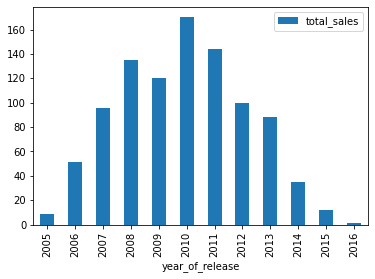

PS3


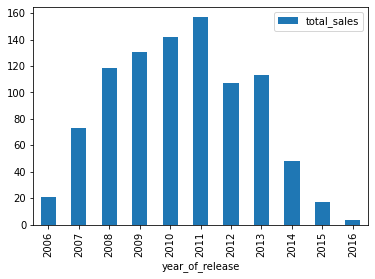

Wii


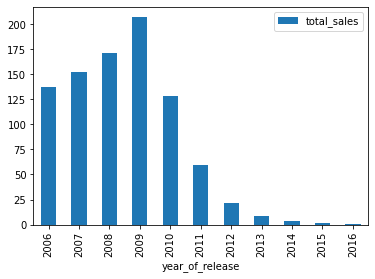

DS


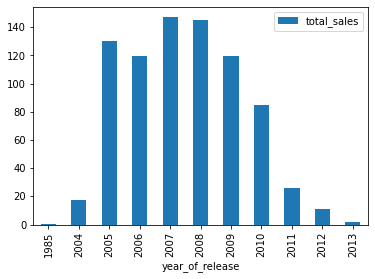

PS


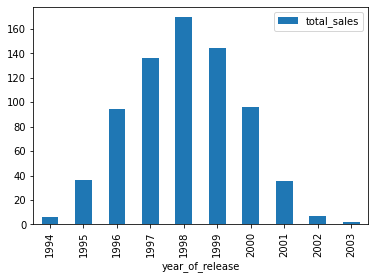

In [19]:
# я не стал формировать список платформ из датафрейма, а для простаты взял твой список (из ячейки на 3 шт. выше этой)

list_games =["PS2", "X360", "PS3", "Wii", "DS", "PS"]

# "for platform_name in list_games" - бежим (итерируемся) по элементам списка и для каждого наименования платформы - вначале 
# печатаем его (как имя графика), а затем же график строим, затем переходим к следующему элементу списка (фактически 
# следующей платформе). Это кусочек проверял - графики ниже от него:

for platform_name in list_games:
    print(platform_name)
    (data_top
     .query('platform == @platform_name')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()
    
# в твоем случае, когда ты строишь график используя свою функцию games - вот **примерный** псевдокод (не проверял его 
# на запуск и корректность, но доработать его проблем думаю не будет если он не будет работать):

# for platform_name in list_games:
#     (games(data_platform_top.query('platform == @platform_name'), 'платформа' + platform_name')
#     )
#     plt.show()

Вывод : 
Из графиков мы видим, что каждая из платформ 'прожила'в среднем по 10 лет.

DS с 2004 по 2013 (9 лет)

X360 с 2005 по 2015 (10 лет)

PS3 с 2006 по 2016 (10 лет)

PS2 с 2000 по 2010 (10 лет)

PS с 1994 по 2002 (8 лет)

Wii с 2006 по 2013 (7 лет)


Также, проанализировав графики, можно увидеть, что основной период развития игр - 2005 - 2016 год.
За актуальный период возьмем 2014-2016 год для дальнейших расчетов.

In [20]:
data = data[data['year_of_release']>=2014]

### Посмотрим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [21]:
data_platform_total = data.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum')

<AxesSubplot:xlabel='platform,year_of_release'>

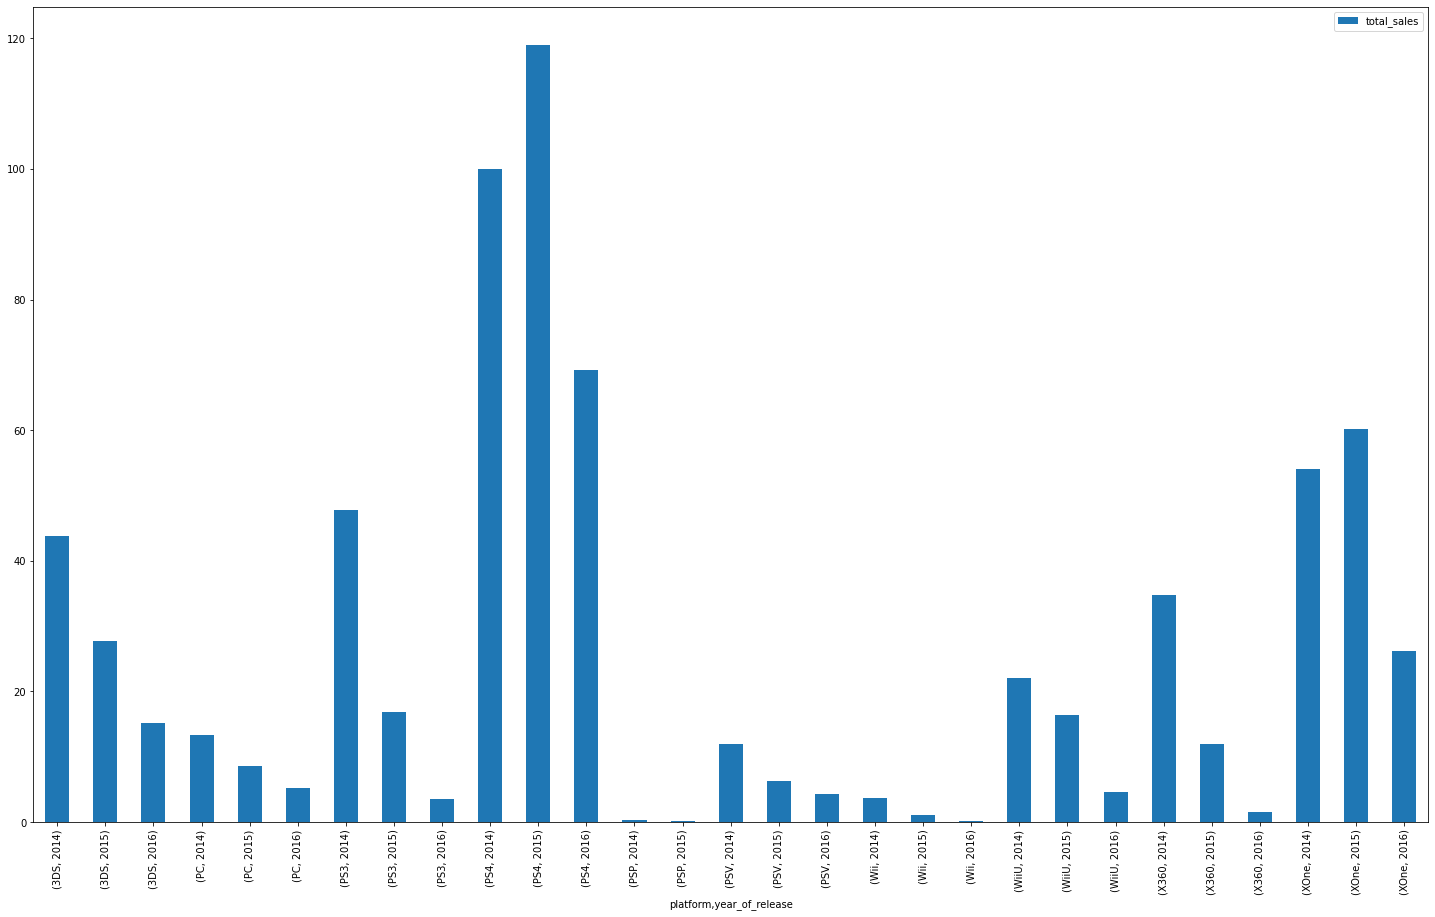

In [22]:
data_platform_total.plot(kind = 'bar', figsize=(25,15))

Исходя из общего графика можно сделать вывод, что продажи у всех платформ падают.
Самыми прибыльными остаются :

1) PS4

2) XOne

3) 3DS

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0, 0.5, 'Глобальные продажи')

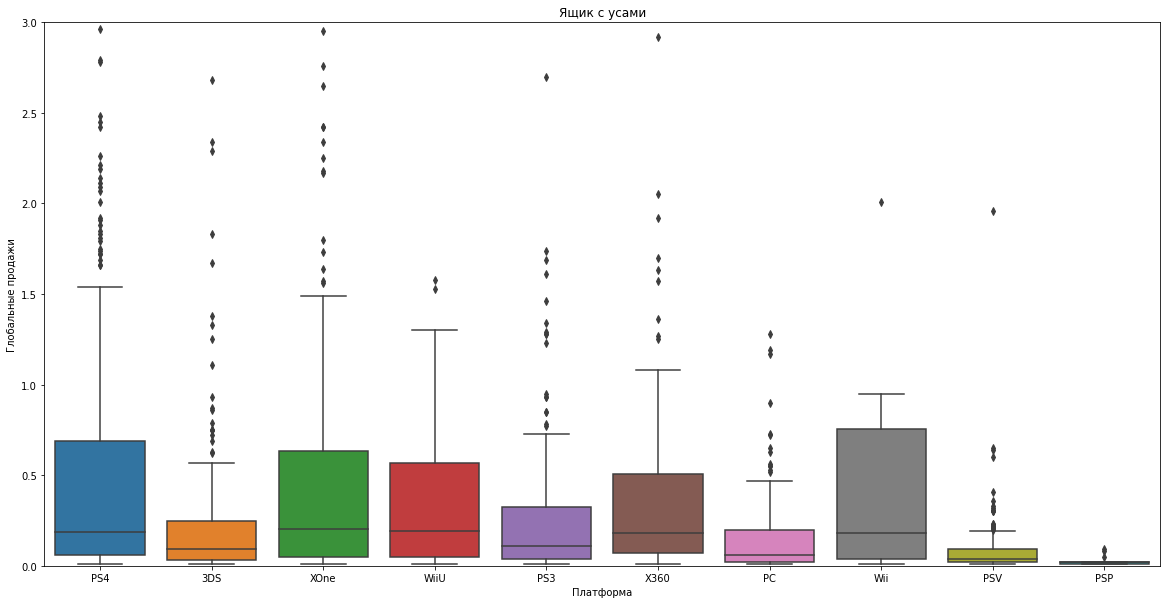

In [23]:
#Cтроим ящик с усами
plt.figure(figsize=(20,10))
plt.ylim(0,3)
sns.boxplot(data=data, x='platform', y='total_sales')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')


Text(0, 0.5, 'Глобальные продажи')

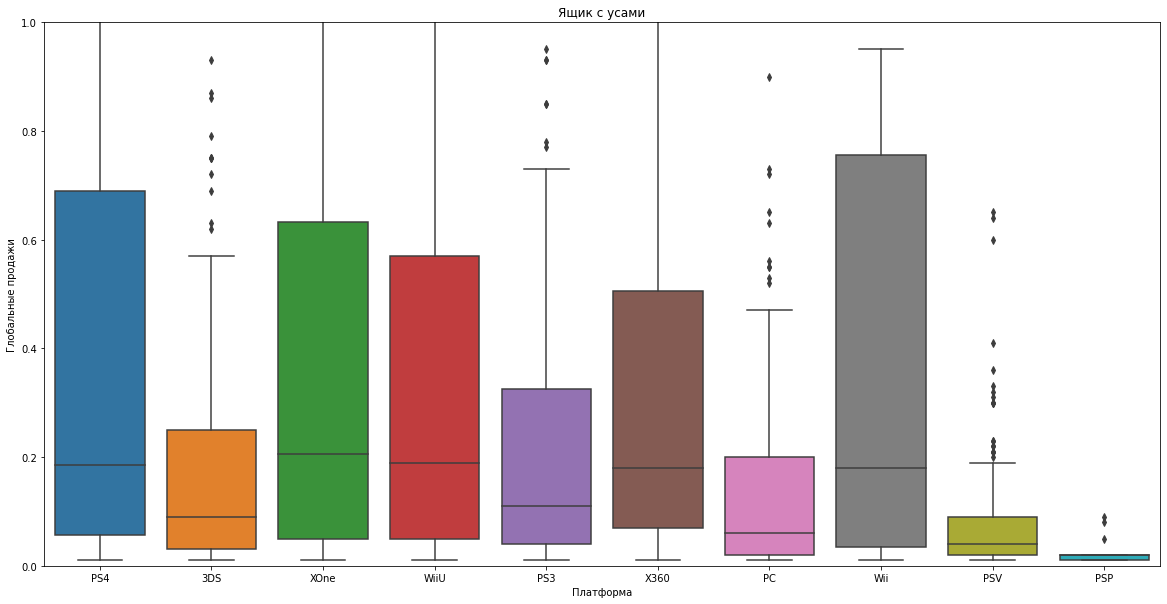

In [24]:
# рассмотрим поближе
plt.figure(figsize=(20,10))
plt.ylim(0,1)
sns.boxplot(data=data, x='platform', y='total_sales')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

Вывод:

Наибольшие продажи у платформ X360, PS4, XOne, WiiU, Wii (их медиана больше остальных и примерно равны между собой).

Почти у всех платформ есть много выбросов.

У платформ PSP, PSV очень мало продаж.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

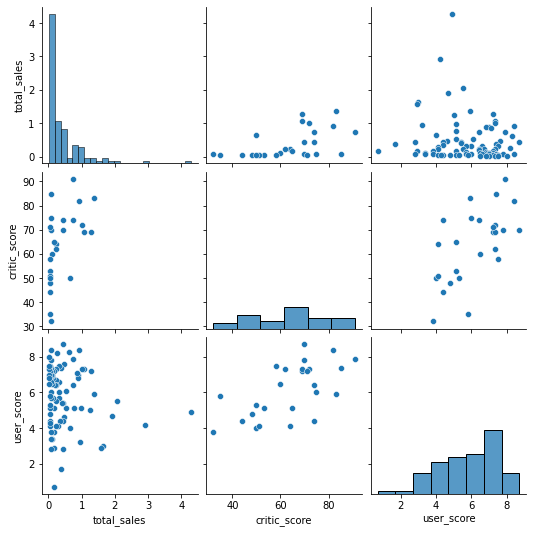

In [25]:
# Будем смотреть на примере X360
sns.pairplot(data[data.platform == "X360"][['total_sales', 'critic_score', 'user_score']])
plt.show()

In [26]:
#Считаем корреляцию
data[data.platform == "X360"][['total_sales', 'critic_score', 'user_score']].corr()


,total_sales,critic_score,user_score
total_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


Вывод:

Из графика и матрицы мы можем увидеть, что корреляция между продажами и оценкой критиков больше 0.5, корреляция высокая. 

Оценки пользователей сильно не влияют на общие продажи.

Также можно заметить, что есть зависимость между оценками пользоватей и оценками критиков. 

### Соотнесем выводы с продажами игр на других платформах.

In [27]:
def corr (platform, title):
    print()
    print(platform)
    sns.pairplot(data[data.platform == platform][['total_sales', 'critic_score', 'user_score']])
    plt.title(title)
    plt.show()
    
    print(data[data.platform == platform][['total_sales', 'critic_score', 'user_score']].corr())


PS4


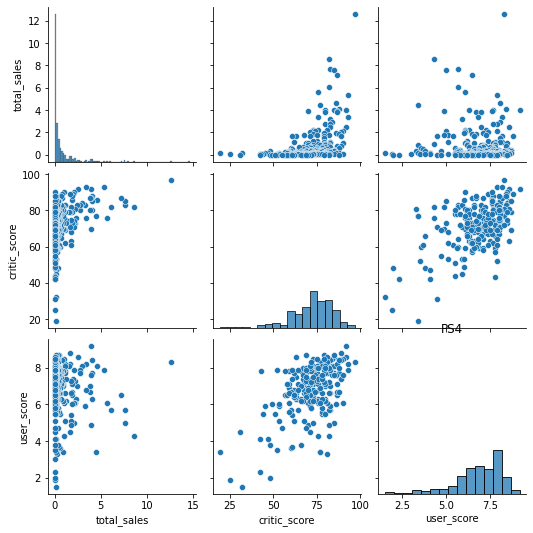

              total_sales  critic_score  user_score
total_sales      1.000000      0.402661   -0.040132
critic_score     0.402661      1.000000    0.546434
user_score      -0.040132      0.546434    1.000000

3DS


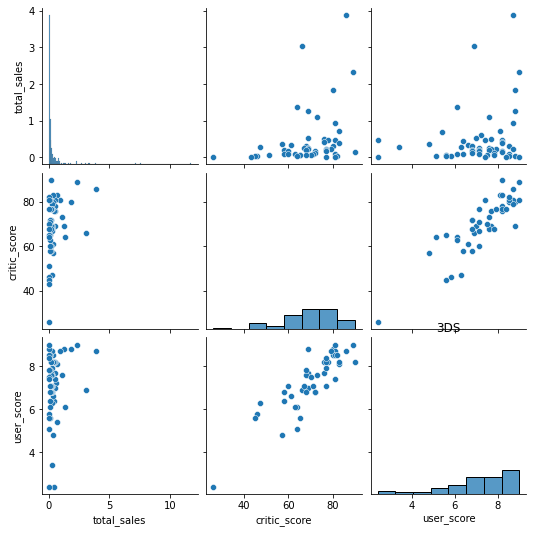

              total_sales  critic_score  user_score
total_sales      1.000000      0.314117    0.215193
critic_score     0.314117      1.000000    0.862485
user_score       0.215193      0.862485    1.000000

XOne


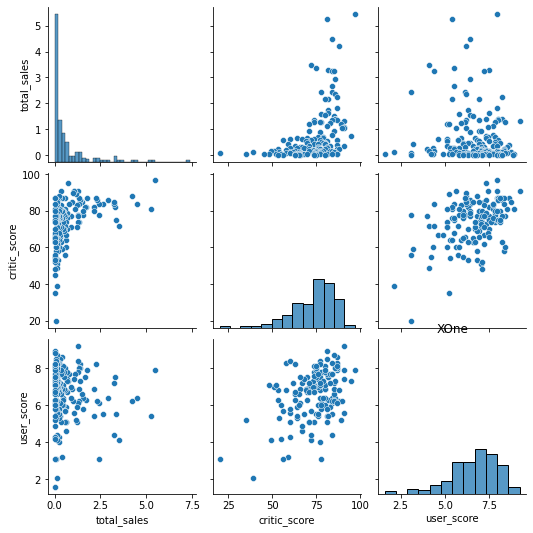

              total_sales  critic_score  user_score
total_sales      1.000000      0.428677   -0.070384
critic_score     0.428677      1.000000    0.440977
user_score      -0.070384      0.440977    1.000000

WiiU


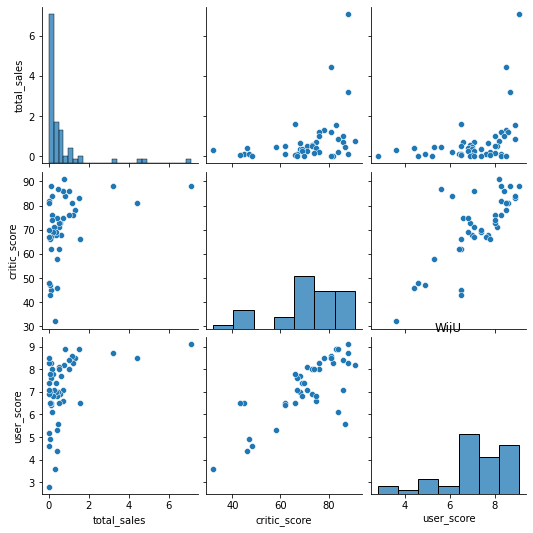

              total_sales  critic_score  user_score
total_sales      1.000000      0.370201    0.407926
critic_score     0.370201      1.000000    0.763536
user_score       0.407926      0.763536    1.000000

PS3


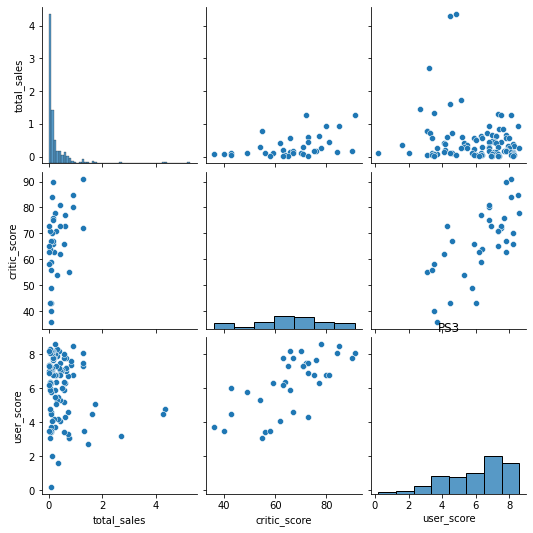

              total_sales  critic_score  user_score
total_sales      1.000000      0.446575   -0.166761
critic_score     0.446575      1.000000    0.693445
user_score      -0.166761      0.693445    1.000000

X360


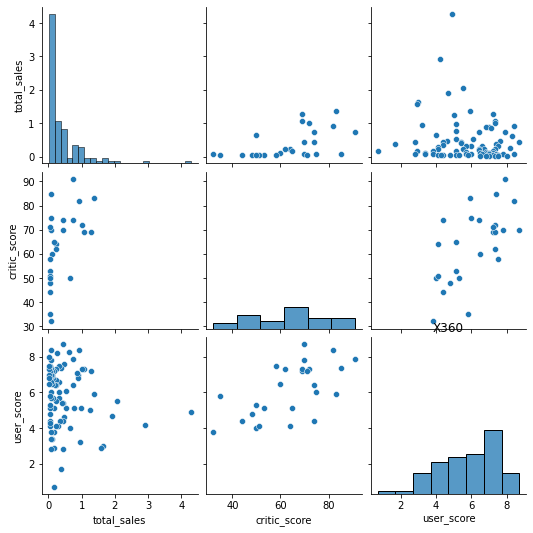

              total_sales  critic_score  user_score
total_sales      1.000000      0.525723   -0.138445
critic_score     0.525723      1.000000    0.625309
user_score      -0.138445      0.625309    1.000000

PC


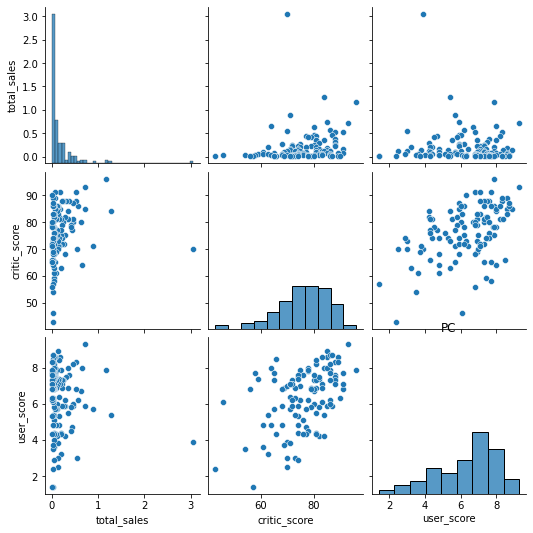

              total_sales  critic_score  user_score
total_sales      1.000000      0.174634   -0.071597
critic_score     0.174634      1.000000    0.466099
user_score      -0.071597      0.466099    1.000000

Wii


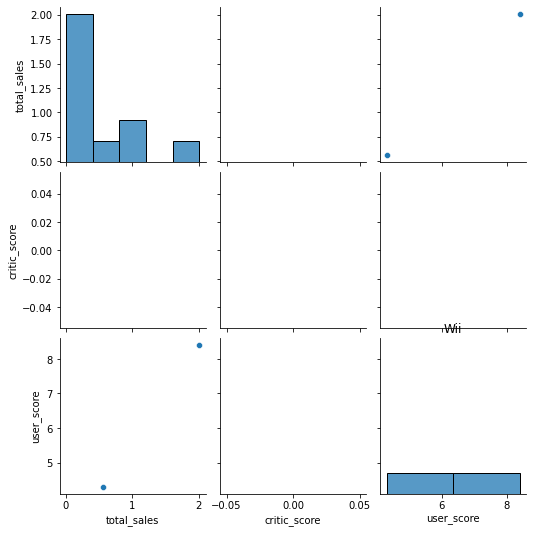

              total_sales  critic_score  user_score
total_sales           1.0           NaN         1.0
critic_score          NaN           NaN         NaN
user_score            1.0           NaN         1.0

PSV


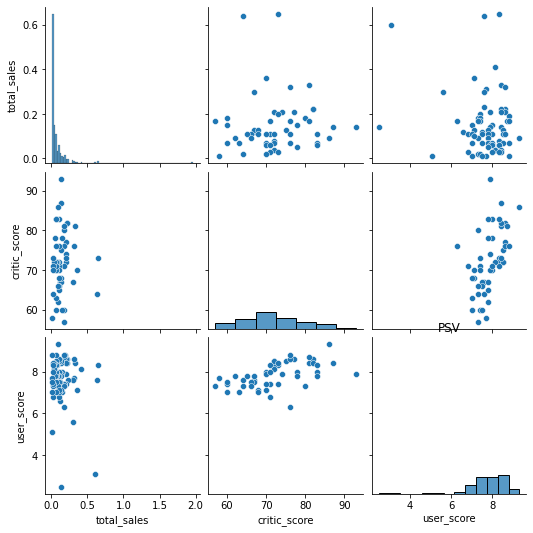

              total_sales  critic_score  user_score
total_sales      1.000000      0.042665   -0.168455
critic_score     0.042665      1.000000    0.524066
user_score      -0.168455      0.524066    1.000000

PSP


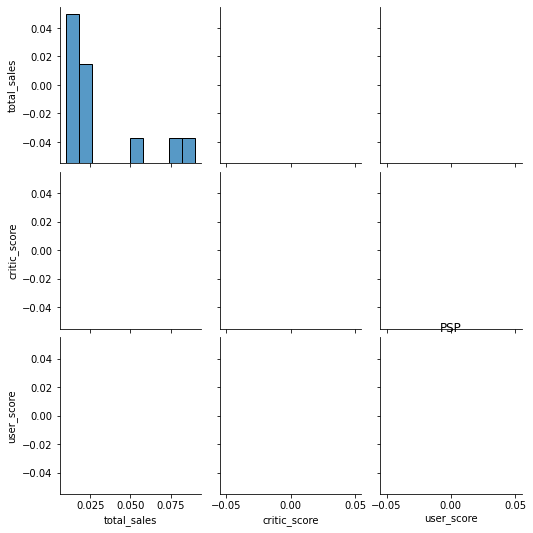

              total_sales  critic_score  user_score
total_sales           1.0           NaN         NaN
critic_score          NaN           NaN         NaN
user_score            NaN           NaN         NaN


In [28]:
list_one = data['platform'].unique()
for i in list_one:
    corr(i,i)

Вывод : 

Можно заметить, что у всех платформ средняя корреляция между продажами и оценкой критиков  0.4, умеренная.

А связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет.

Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей. 

### Посмотрим на общее распределение игр по жанрам.


<AxesSubplot:xlabel='genre'>

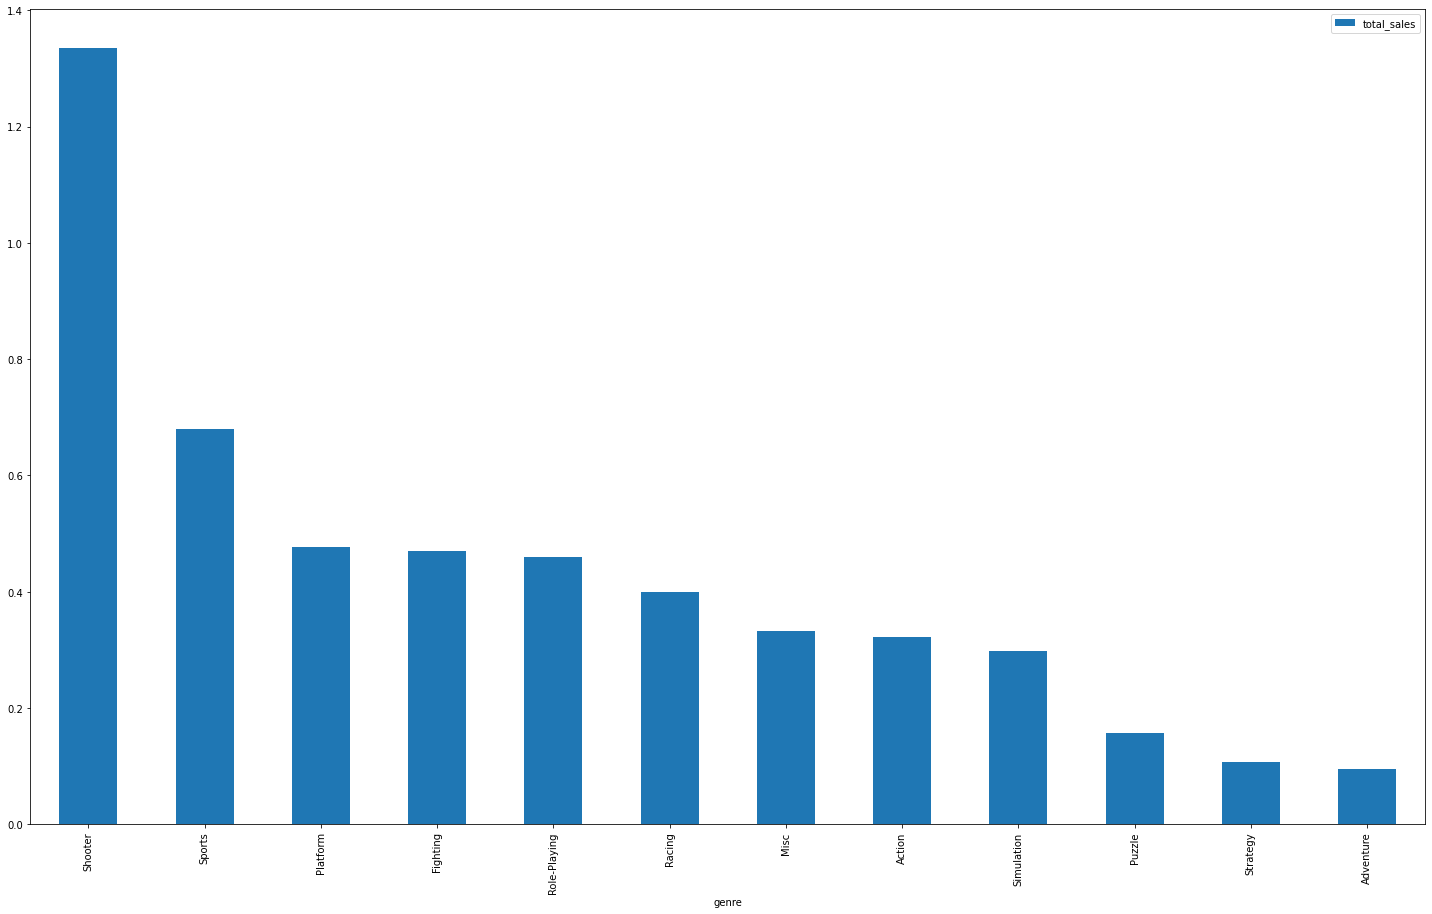

In [29]:
#создадим сводную таблицу по жанрам и посомтрим топ
data_genre_total = data.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = 'mean').sort_values(by ='total_sales', ascending = False)
data_genre_total.plot(kind = 'bar', figsize=(25,15))

Вывод: 

По графику видно, что самые прибыльный жанр это Shooter, самый непопулярный жанр Adventure . 

### Общий вывод 

Количество игр на игровые приставки и компьютеры начало расти с 1990х годов до 2008 года. В 2008 году произошел резкий спад в производстве игр.

Самые популярные игровые платформы за весь период : PS2, X360, PS3, WII, DS, PS

Средняя жизнь игровой платформы составляет 10 лет.

Наибольшие продажи у платформ X360, PS4, XOne.

У всех платформ наблюдается взаимосвязь между продажами и оценками критиков. 

Самый популярный жанр - Shooter.

## Составим портрет пользователя каждого региона (Определим для пользователя каждого региона (NA, EU, JP))

### Самые популярные платформы (топ-5). 

In [30]:
# функция для построения графиков по сводным таблицам
def regions(groupby, sales, title):
    data.groupby(groupby).agg({sales: 'sum'}).sort_values(by=sales, ascending=False)[:5].plot(kind='bar', figsize = (10,5), title = title)
    

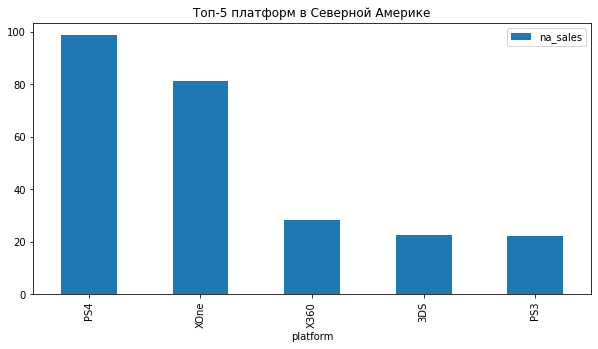

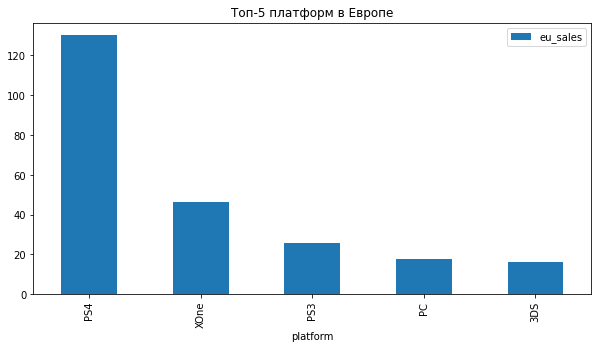

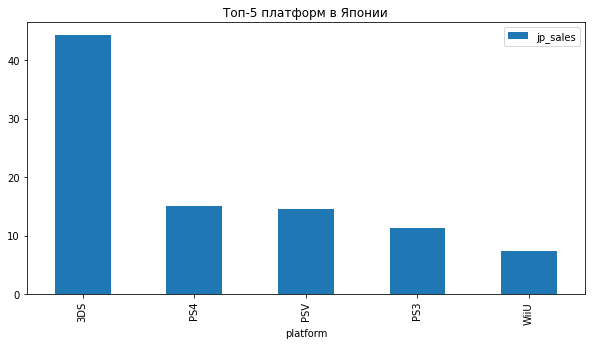

In [31]:
regions('platform', 'na_sales', 'Топ-5 платформ в Северной Америке')
regions('platform', 'eu_sales', 'Топ-5 платформ в Европе')
regions('platform', 'jp_sales', 'Топ-5 платформ в Японии')

Вывод:

В Северной Америке самые популярные приставки PS4 и  XOne. На 3 месте X360.

В Европе популярны PS4 и XOne. За ними идет PS3.

В Японии  на первом месте 3DS. За ним PS4. Далее PSV.

Заметим, что платформа PS4 входит в топ-3 во всех регионах.

### Самые популярные жанры (топ-5). 

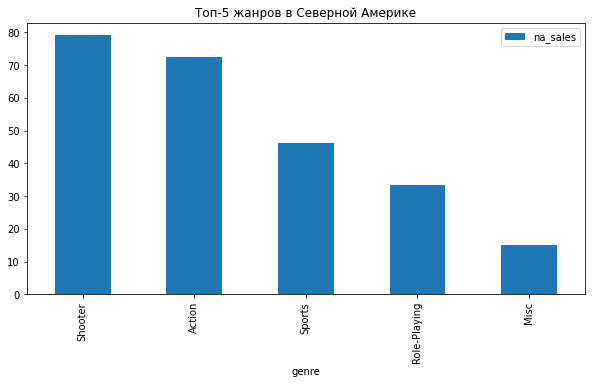

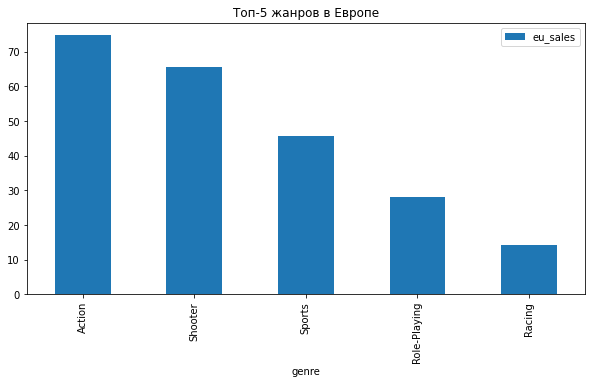

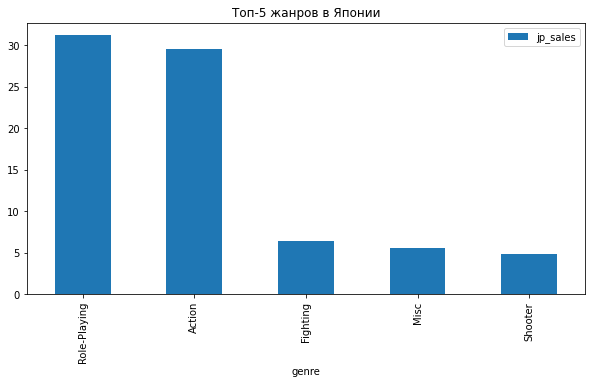

In [32]:
regions('genre', 'na_sales', 'Топ-5 жанров в Северной Америке')
regions('genre', 'eu_sales', 'Топ-5 жанров в Европе')
regions('genre', 'jp_sales', 'Топ-5 жанров в Японии')

Вывод:

В Северной Америке и Европе наиболее популярны игры жанра Action, Shooter, Sports.

В Японии  Action на втором месте по популярности, на первом Role-Plaing.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

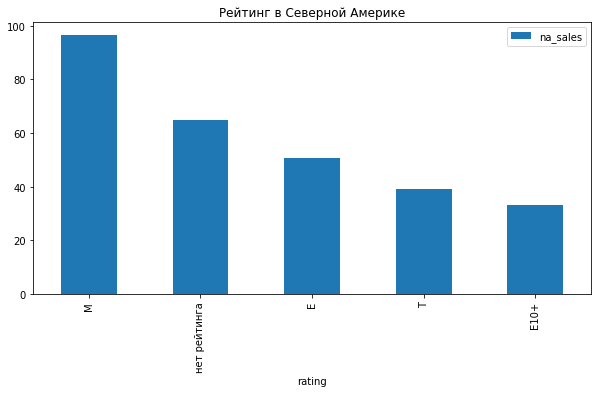

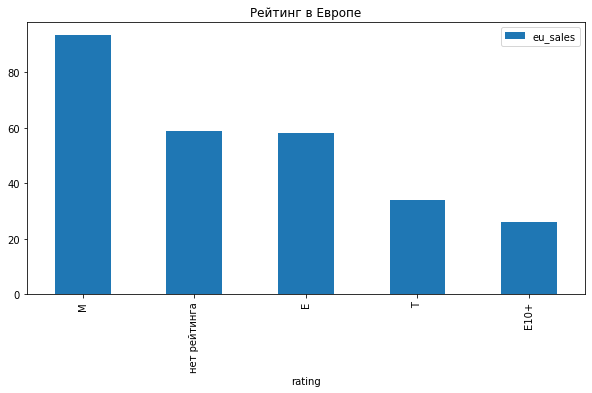

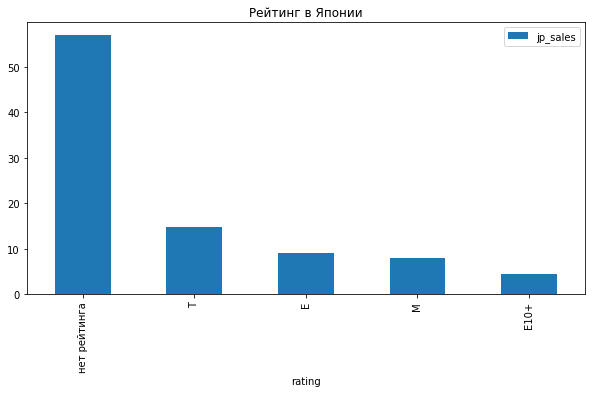

In [33]:
regions('rating', 'na_sales', 'Рейтинг в Северной Америке')
regions('rating', 'eu_sales', 'Рейтинг в Европе')
regions('rating', 'jp_sales', 'Рейтинг в Японии')

Вывод:

В Европе и Америке игры с рейтингом E - "для всех" имеют больше всего продаж, далее идут игры без рейтинга.

В Японии на первом месте по продажам игры без рейтинга, а на втором игры с рейтингом T - «подросткам».

### Общий вывод

Портеры пользователей:

Пользователи в Cеверной Америке пользуются Xone, PS4, X360.

Самый популярный жанр в северной америке : shooter

По графику видно, что больше всего продаж у игр с рейтингом  E - "для всех".

----------------------

Пользователи в Европе пользуются PS4, PS3, Xone.

Самый популярный жанр в Европе : action

По графику видно, что больше всего продаж у игр с рейтингом E -"для всех".

---------------------

Пользователи в Японии пользуются 3DS, PS4, PSV.

Самый популярный жанр в Японии : Role-Playing

По графику видно, что больше всего продаж у игр без рейтинга.



## Проверка гипотез

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

1 Гипотеза. 

H0 = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 = Средние пользовательские рейтинги платформ Xbox One и PC  различаются.

Будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.(ttest Стьюдента)


In [34]:
# посчитаем средние пользовательские рейтинги платформы Xbox One 
xone = data.query('platform == "XOne"').dropna()
mean_xone = xone['user_score'].mean()
print('Cредние пользовательские рейтинги платформы Xbox One :',mean_xone)
# посчитаем средние пользовательские рейтинги платформы PC 
pc = data.query('platform == "PC"').dropna()
mean_pc = pc['user_score'].mean()
print('Cредние пользовательские рейтинги платформы PC :', mean_pc)

Cредние пользовательские рейтинги платформы Xbox One : 6.620529801324504
Cредние пользовательские рейтинги платформы PC : 6.3417391304347825


In [35]:
alpha = 0.05
result_one = st.ttest_ind (xone['user_score'], pc['user_score'], equal_var = False)
print('p-значение:',result_one.pvalue)
if result_one.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть гипотезу')

p-значение: 0.1403785186826978
Не получилось отвергнуть гипотезу


Вывод :

Значение р-value 0,14. Не получилось отвергнуть гипотезу.

Значит средняя оценка пользователей платформы XBox One не сильно отличается или не отличается от средней оценки пользователей платформы PC.


###  Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

2 Гипотеза.

Ho = средние оценки пользователей жанров Action и Sports равны;

H1 = средние оценки отличаются.

In [36]:
# посчитаем средние пользовательские рейтинги жанра Action  
action = data.query('genre == "Action"').dropna()
mean_action = action['user_score'].mean()
print('Cредние пользовательские рейтинги жанра Action  :', mean_action)
# посчитаем средние пользовательские рейтинги жанра Sports 
sports = data.query('genre == "Sports"').dropna()
mean_sports = sports['user_score'].mean()
print('Cредние пользовательские рейтинги жанра Sports  :', mean_sports)

Cредние пользовательские рейтинги жанра Action  : 6.832599118942731
Cредние пользовательские рейтинги жанра Sports  : 5.68433734939759


In [37]:
alpha = 0.05
result_one = st.ttest_ind (action['user_score'], sports['user_score'], equal_var = False)
print('p-значение:',result_one.pvalue)
if result_one.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть гипотезу')

p-значение: 8.327612976032047e-09
Отвергаем нулевую гипотезу


Вывод :

Значение р-value очень мало. Отвергаем нулевую гипотезу.

Значит cредние пользовательские рейтинги жанров Action и Sports разные.

Из расчета средних, можно сказать, что игры жанра Action получают оценки выше, чем игры жанра Sports.


## Общий вывод

Количество игр на игровые приставки и компьютеры начало расти с 1990х годов до 2008 года. 

В 2008 году произошел резкий спад в производстве игр.

Самые популярные игровые платформы за весь период : PS2, X360, PS3, WII, DS, PS 

Средняя жизнь игровой платформы составляет 10 лет.

Наибольшие продажи у платформ X360, PS4, XOne, WiiU, Wii. 

Оценки критиков влияют на общие продажи, оценки пользователей не влияют.

Самый прибыльный жанр - Shooter.

---------
В Cеверной Америке самая популярная платформа PS4.

Европейцы предпочитают PS4. 

В Японии популярны 3DS.

В NA и EU самые популярные жанры практически совпадают - action, shooter. 

В JP вкусы сильно отличаются - Role-Playing

Во Америке и Европе лидируют игры с рейтингом E - "для всех". В японии игры без рейтинга.

-------
Cредняя оценка пользователей платформы XBox One не сильно отличается от средней оценки пользователей платформы PC.

Cредние пользовательские рейтинги жанров Action и Sports разные.

